In [2]:
import pandas as pd
movie_reviews = pd.read_csv("fandango_score_comparison.csv")

In [3]:
movie_reviews.head(2)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5


In [4]:
title=movie_reviews.columns.values.tolist()
print(title)

['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue', 'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom', 'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round', 'Metacritic_norm_round', 'Metacritic_user_norm_round', 'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Fandango_votes', 'Fandango_Difference']


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

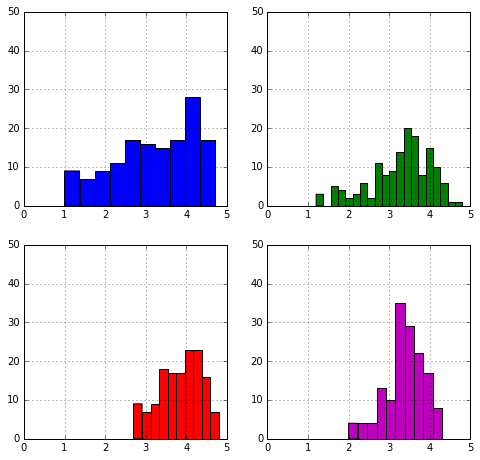

In [6]:
fig = plt.figure(figsize=(8,16))
ax1 = fig.add_subplot(4,2,1)
ax2 = fig.add_subplot(4,2,2)
ax3 = fig.add_subplot(4,2,3)
ax4 = fig.add_subplot(4,2,4)
ax1.set_xlim(0,5.0)
ax2.set_xlim(0,5.0)
ax3.set_xlim(0,5.0)
ax4.set_xlim(0,5.0)
ax1.set_ylim(0,50.0)
ax2.set_ylim(0,50.0)
ax3.set_ylim(0,50.0)
ax4.set_ylim(0,50.0)
movie_reviews["RT_user_norm"].hist(ax=ax1)
movie_reviews["Metacritic_user_nom"].hist(ax=ax2,color='g',bins=20)
movie_reviews["Fandango_Ratingvalue"].hist(ax=ax3,color='r')
movie_reviews["IMDB_norm"].hist(ax=ax4,color='m')

In [7]:
print(type(movie_reviews))

<class 'pandas.core.frame.DataFrame'>


In [8]:
tipi=movie_reviews.dtypes
print(tipi)

FILM                           object
RottenTomatoes                  int64
RottenTomatoes_User             int64
Metacritic                      int64
Metacritic_User               float64
IMDB                          float64
Fandango_Stars                float64
Fandango_Ratingvalue          float64
RT_norm                       float64
RT_user_norm                  float64
Metacritic_norm               float64
Metacritic_user_nom           float64
IMDB_norm                     float64
RT_norm_round                 float64
RT_user_norm_round            float64
Metacritic_norm_round         float64
Metacritic_user_norm_round    float64
IMDB_norm_round               float64
Metacritic_user_vote_count      int64
IMDB_user_vote_count            int64
Fandango_votes                  int64
Fandango_Difference           float64
dtype: object


In [9]:
print(type(movie_reviews['RT_norm']))

<class 'pandas.core.series.Series'>


In [10]:
print(type(movie_reviews['RT_norm'].values))

<type 'numpy.ndarray'>


In [11]:
def calc_mean(series):
    val=series.values
    return sum(val)/len(val)
    

In [12]:
mean1=calc_mean(movie_reviews["RT_user_norm"])
mean2=movie_reviews["RT_user_norm"].mean()
print(mean1,mean2)

(3.1938356164383572, 3.1938356164383572)


In [13]:
columns=["RT_user_norm", "Metacritic_user_nom", "Fandango_Ratingvalue", "IMDB_norm"]
user_reviews = movie_reviews[columns]

In [14]:
user_means=user_reviews.apply(calc_mean)
print(user_means)

RT_user_norm            3.193836
Metacritic_user_nom     3.259589
Fandango_Ratingvalue    3.845205
IMDB_norm               3.368493
dtype: float64


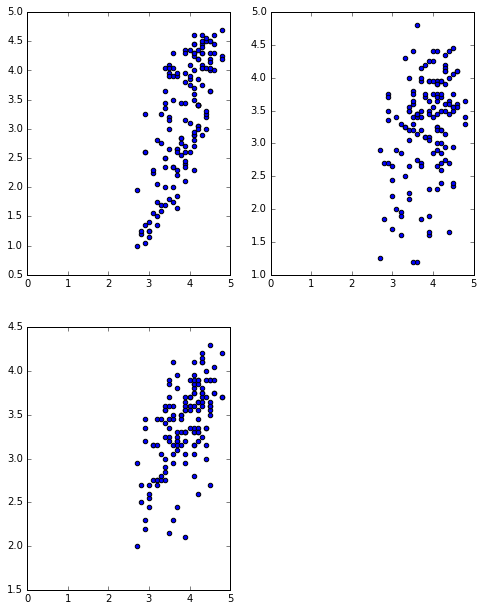

In [15]:
fig = plt.figure(figsize=(8,16))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax1.set_xlim(0,5.0)
ax2.set_xlim(0,5.0)
ax3.set_xlim(0,5.0)
ax1.scatter(user_reviews["Fandango_Ratingvalue"],user_reviews["RT_user_norm"])
ax2.scatter(user_reviews["Fandango_Ratingvalue"],user_reviews["Metacritic_user_nom"])
ax3.scatter(user_reviews["Fandango_Ratingvalue"],user_reviews["IMDB_norm"])

In [91]:
import numpy as np
def calc_variance(serie):
    val=serie.values
    mean=calc_mean(serie)
    diff_mean=[(i-mean)**2 for i in serie]
    print(type(diff_mean))
    diff_mean2=np.asarray(diff_mean)
    print(type(diff_mean2))
    diff_mean3=pd.Series(diff_mean2)
    print(type(diff_mean3))
    var=calc_mean(diff_mean3)
    return var
variance={}
for i in columns:
    variance[i]=calc_variance(user_reviews[i])
print(type(variance))

<type 'list'>
<type 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<type 'list'>
<type 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<type 'list'>
<type 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<type 'list'>
<type 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<type 'dict'>


In [30]:
def calc_covariance(serie1,serie2):
    val1=serie1.values
    val2=serie2.values
    mean1=calc_mean(serie1)
    mean2=calc_mean(serie2)
    aus1=[(i-mean1)*(j-mean2) for i in val1 for j in val2]
    aus1=np.asarray(aus1)
    covar=sum(aus1)#/len(val1)
    x_diffs = [i - mean1 for i in val1]
    y_diffs = [i - mean2 for i in val2]
    codeviates = [x_diffs[i] * y_diffs[i] for i in range(len(val1))]
    covar0=sum(codeviates) / len(codeviates)
    return covar0
    #
    #print(type(aus1))
   
    

In [85]:
covariance={}
for i in columns:
    for j in columns:
        covariance[i+' vs '+j]=calc_covariance(user_reviews[i],user_reviews[j])
print(type(covariance))

<type 'dict'>


In [86]:
print(covariance)

{'Metacritic_user_nom vs RT_user_norm': 0.51610363107524848, 'RT_user_norm vs IMDB_norm': 0.42675783449052335, 'RT_user_norm vs Fandango_Ratingvalue': 0.36216222555826588, 'IMDB_norm vs RT_user_norm': 0.42675783449052335, 'IMDB_norm vs Metacritic_user_nom': 0.27196307937699393, 'Fandango_Ratingvalue vs IMDB_norm': 0.14371880277725671, 'Metacritic_user_nom vs Metacritic_user_nom': 0.5666546256333268, 'Metacritic_user_nom vs Fandango_Ratingvalue': 0.1271007693751173, 'Fandango_Ratingvalue vs RT_user_norm': 0.36216222555826588, 'IMDB_norm vs Fandango_Ratingvalue': 0.14371880277725671, 'RT_user_norm vs RT_user_norm': 0.99557843873146901, 'Metacritic_user_nom vs IMDB_norm': 0.27196307937699393, 'RT_user_norm vs Metacritic_user_nom': 0.51610363107524848, 'Fandango_Ratingvalue vs Fandango_Ratingvalue': 0.25110714955901703, 'Fandango_Ratingvalue vs Metacritic_user_nom': 0.1271007693751173, 'IMDB_norm vs IMDB_norm': 0.22821964721336099}


In [101]:
for i in columns:
    for j in columns:
        correlation=covariance[i+' vs '+j]/(variance[i]**0.5*variance[j]**0.5)
        if i<j:
            print(i,j,covariance[i+' vs '+j],correlation)

('Metacritic_user_nom', 'RT_user_norm', 0.51610363107524848, 0.68713165178044588)
('Fandango_Ratingvalue', 'RT_user_norm', 0.36216222555826588, 0.72432899424931385)
('Fandango_Ratingvalue', 'Metacritic_user_nom', 0.1271007693751173, 0.33694531426494839)
('Fandango_Ratingvalue', 'IMDB_norm', 0.14371880277725671, 0.60035417726263651)
('IMDB_norm', 'RT_user_norm', 0.42675783449052335, 0.89529724194777616)
('IMDB_norm', 'Metacritic_user_nom', 0.27196307937699393, 0.75626537313647757)


In [103]:
print(covariance.keys())

['Metacritic_user_nom vs RT_user_norm', 'RT_user_norm vs IMDB_norm', 'RT_user_norm vs Fandango_Ratingvalue', 'IMDB_norm vs RT_user_norm', 'IMDB_norm vs Metacritic_user_nom', 'Fandango_Ratingvalue vs IMDB_norm', 'Metacritic_user_nom vs Metacritic_user_nom', 'Metacritic_user_nom vs Fandango_Ratingvalue', 'Fandango_Ratingvalue vs RT_user_norm', 'IMDB_norm vs Fandango_Ratingvalue', 'RT_user_norm vs RT_user_norm', 'Metacritic_user_nom vs IMDB_norm', 'RT_user_norm vs Metacritic_user_nom', 'Fandango_Ratingvalue vs Fandango_Ratingvalue', 'Fandango_Ratingvalue vs Metacritic_user_nom', 'IMDB_norm vs IMDB_norm']
